# Welcome to the basics of OPENCV 
### We will work through some things that are important to know about computer vision functions



1.   Importing and displaying an image
2.   Importing and displaying a video
3.  Importing live feed of a webcam




Importing libraries

In [ ]:
import cv2
from matplotlib import pyplot as plt

1) Importing and displaying an image




--2021-02-08 23:40:45--  https://raw.githubusercontent.com/ankitcivic/opencv_basics/main/samples/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 478166 (467K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 466.96K  --.-KB/s    in 0.04s   

2021-02-08 23:40:45 (10.3 MB/s) - ‘cat.jpg’ saved [478166/478166]



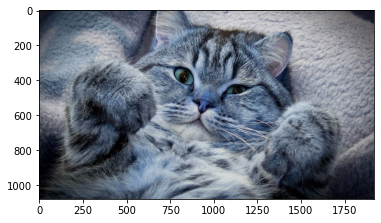

In [34]:
#download image
!wget "https://raw.githubusercontent.com/ankitcivic/opencv_basics/main/samples/cat.jpg" -O cat.jpg
img = cv2.imread('./cat.jpg')

plt.imshow(img)
plt.show()

2) Importing and displaying a video

In [59]:
#download video
url = 'https://github.com/ankitcivic/opencv_basics/blob/main/samples/team.mp4?raw=true'

from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

3) Importing live feed from webcam

In [71]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>